In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNEL = 3
EPOCHS = 50

In [10]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("Tomato Dataset",
                                                   shuffle=True, 
                                                   image_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                   batch_size = BATCH_SIZE)

Found 3600 files belonging to 3 classes.


In [11]:
class_names = dataset.class_names
class_names

['Early_blight', 'Late_blight', 'Tomato_healthy']

In [12]:
len(dataset)

113

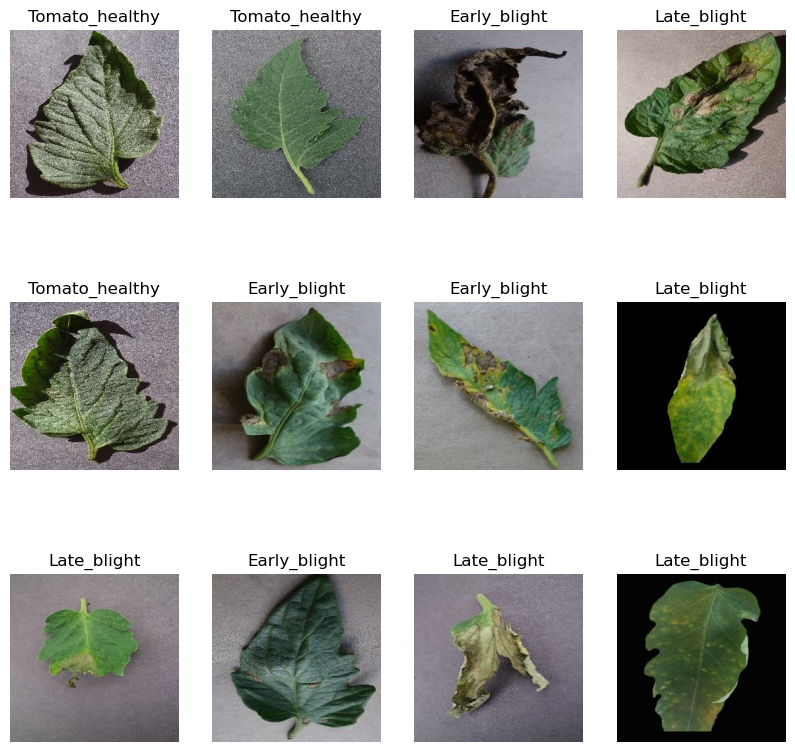

In [27]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    
    

In [49]:
trian_size = 0.8
len(dataset)*trian_size

90.4

In [50]:
train_ds = dataset.take(90)
len(train_ds)

90

In [51]:
test_ds = dataset.skip(90)
len(test_ds)

23

In [52]:
val_size = 0.1
len(dataset)*val_size

11.3

In [53]:
val_ds = test_ds.take(11)
len(val_ds)

11

In [54]:
test_ds = test_ds.skip(11)
len(test_ds)

12

In [62]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split * ds_size)
    val_size = int (val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds        

In [63]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [64]:
len(train_ds)

90

In [65]:
len(val_ds)

11

In [66]:
len(test_ds)

12

In [71]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [75]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

In [77]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])